In [78]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [3]:
matplotlib inline

In [5]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
open('yob2015.txt','r').readlines()[:5]

['Emma,F,20455\n',
 'Olivia,F,19691\n',
 'Sophia,F,17417\n',
 'Ava,F,16378\n',
 'Isabella,F,15617\n']

In [77]:
names2015 = pd.read_csv('yob2015.txt', names = ['Name', 'Sex', 'Babies'])
names2015.head()

,Name,Sex,Babies
0,Emma,F,20455
1,Olivia,F,19691
2,Sophia,F,17417
3,Ava,F,16378
4,Isabella,F,15617


In [10]:
all_years = []
for year in range(1880,2016):
    all_years.append(pd.read_csv('yob{}.txt'.format(year), names = ['Name', 'Sex', 'Babies']))
    all_years[-1]['Year'] = year

In [11]:
all_names = pd.concat(all_years)
all_names.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [13]:
group_name = all_names.groupby(['Sex', 'Year'])
group_name.head()

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [15]:
group_name.size()

Sex  Year
F    1880      942
     1881      938
     1882     1028
     1883     1054
     1884     1172
             ...  
M    2011    14345
     2012    14238
     2013    14041
     2014    14052
     2015    14030
Length: 272, dtype: int64

In [16]:
group_name.size().unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20053,20568,20464,20183,19815,19563,19509,19241,19191,19091
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14035,14393,14615,14526,14258,14345,14238,14041,14052,14030


In [17]:
names2015.groupby(['Sex']).sum()

,Babies
Sex,
F,1780453
M,1911537


In [18]:
pd.pivot_table(all_names,'Babies', 'Name', 'Year')

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,157.0,957.0,636.0,450.0,275.0,224.0,204.0,239.0,297.0


In [19]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Year'])

Babies
Name    Year        
Aaban   2007     5.0
        2009     6.0
        2010     9.0
        2011    11.0
        2012    11.0
...              ...
Zyvion  2009     5.0
Zyvon   2015     7.0
Zyyanna 2010     6.0
Zyyon   2014     6.0
Zzyzx   2010     5.0

[1696160 rows x 1 columns]

In [20]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Sex'], 'Year')

,Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,Sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
all_names_index = all_names.set_index(['Sex','Name','Year']).sort_index()

In [35]:
all_names_index
print(type(all_names_index))

<class 'pandas.core.frame.DataFrame'>


In [62]:
def name_plot(sex, name):
    data = all_names_index.loc[sex,name]
   #data["Babies"].plot()
    pp.plot(data.index.values, data.values)

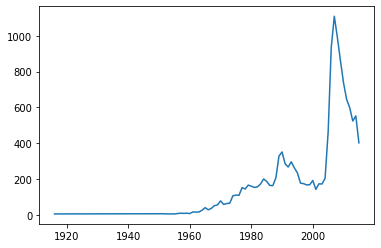

In [63]:
name_plot('F', 'Danica')

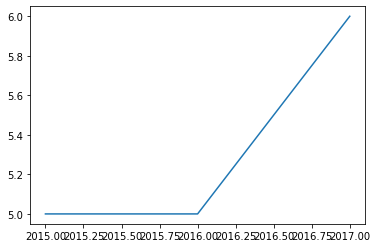

In [29]:
pp.plot([2015,2016,2017], [5,5,6])

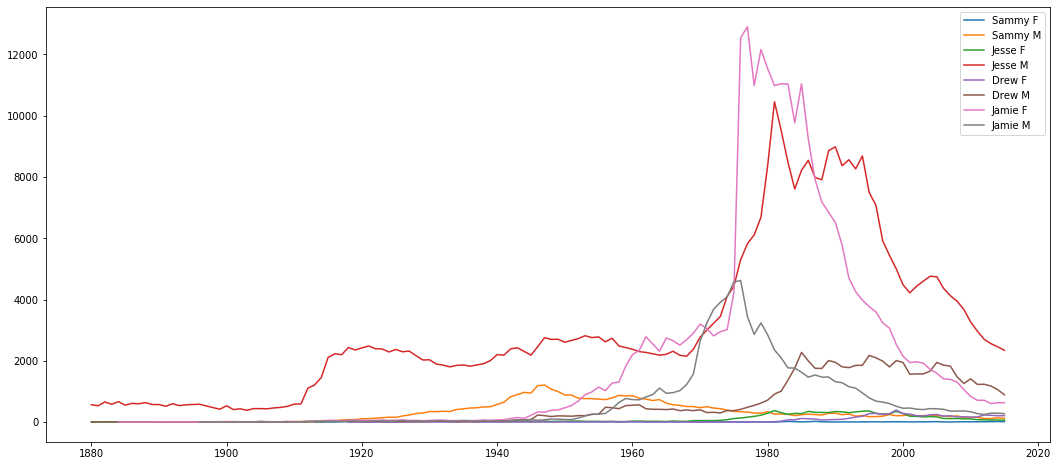

In [75]:
pp.figure(figsize = (18,8))
names = ['Sammy', 'Jesse', 'Drew', 'Jamie']
plot_legend = []
for name in names:
    name_plot('F', name)
    name_plot('M', name)
    plot_legend.extend([name + ' F', name + ' M'])
    
pp.legend(plot_legend)